In [1]:
from useful_scit.imps import *

In [2]:
from sectional_v2.util.Nd.sizedist_class_v2.SizedistributionBins import SizedistributionStationBins
from sectional_v2.util.Nd.sizedist_class_v2.SizedistributionStation import SizedistributionStation
from sectional_v2.util.collocate.collocateLONLAToutput import CollocateLONLATout
from sectional_v2.constants import sized_varListNorESM, list_sized_vars_noresm, list_sized_vars_nonsec
#from useful_scit.util import log
import useful_scit.util.log as log
import time
log.ger.setLevel(log.log.INFO)

/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME/
/home/ubuntu/mnts/nird/projects/SECTIONAL_v2/sectional_v2/data_info/area_defs.csv


In [3]:
cases_sec = ['SECTv21_ctrl_koagD']#'SECTv11_noresm2_ctrl', 'SECTv11_ctrl_fbvoc','SECTv11_noresm2_adj','SECTv11_noresm2_eq18']#'SECTv11_noresm2_NFHIST']#'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']#,'SECTv11_ctrl_fbvoc']#'SECTv11_ctrl']
cases_orig =['noSECTv21_default_dd','noSECTv21_ox_ricc_dd',]#, 'noSECTv21_ox_ricc']#'noSECTv11_noresm2_ricc', 'noSECTv11_noresm2_ctrl', 'noSECTv11_ctrl_fbvoc','noSECTv11_ctrl']#'noSECTv11_noresm2_NFHIST']#'noSECTv11_ctrl_fbvoc'] #/no SECTv11_ctrl

cases = cases_orig+cases_sec

# 2008-2009

In [4]:
from_t = '2008-01-01'
to_t = '2009-01-01'

In [5]:
varl_mod=[]#'dNdlogD_mod']
for i in range(1,14):
    if i in [3,11,13]: 
        continue
    varl_mod.append('dNdlogD_mode%02.0f'%i)
varl_sec=[]#'dNdlogD_sec']
for i in range(1,6):
    varl_sec.append('dNdlogD_sec%02.0f'%i)

    
#,'dNdlogD_sec',
n_rows = 6
n_cols=4

In [6]:
#arl=['COAGNUCL','GR','GRSOA','GRH2SO4','NUCLRATE','FORMRATE','SO2', 'SOA_NA','SO4_NA', 'cb_SOA_NA','cb_SO4_NA','H2SO4','SOA_LV','SOA_SV', 'NCONC01','NMR01','SIGMA01']
ds_dic={}
for case_name in cases_sec:
    varlist =varl_mod+varl_sec
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',)
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a
    #if c.check_if_load_raw_necessary(varlist ):
    #    a = c.make_station_data_all()
for case_name in cases_orig:
    varlist =varl_mod
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',)
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a

    


/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//collocated_ds//NorESM/SECTv21_ctrl_koagD/dNdlogD_mode01_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//collocated_ds//NorESM/SECTv21_ctrl_koagD/dNdlogD_mode02_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//collocated_ds//NorESM/SECTv21_ctrl_koagD/dNdlogD_mode04_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//collocated_ds//NorESM/SECTv21_ctrl_koagD/dNdlogD_mode05_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//collocated_ds//NorESM/SECTv21_ctrl_koagD/dNdlogD_mode06_SECTv21_ctrl_koagD_2008-01-01_2009-01-01_hour_locations.nc
/home/ubuntu/mnts/nird/projects//Output_data_SECTIONAL_SCHEME//collocated_ds//NorESM/SECTv21_ctrl_koagD/dNdlog

/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


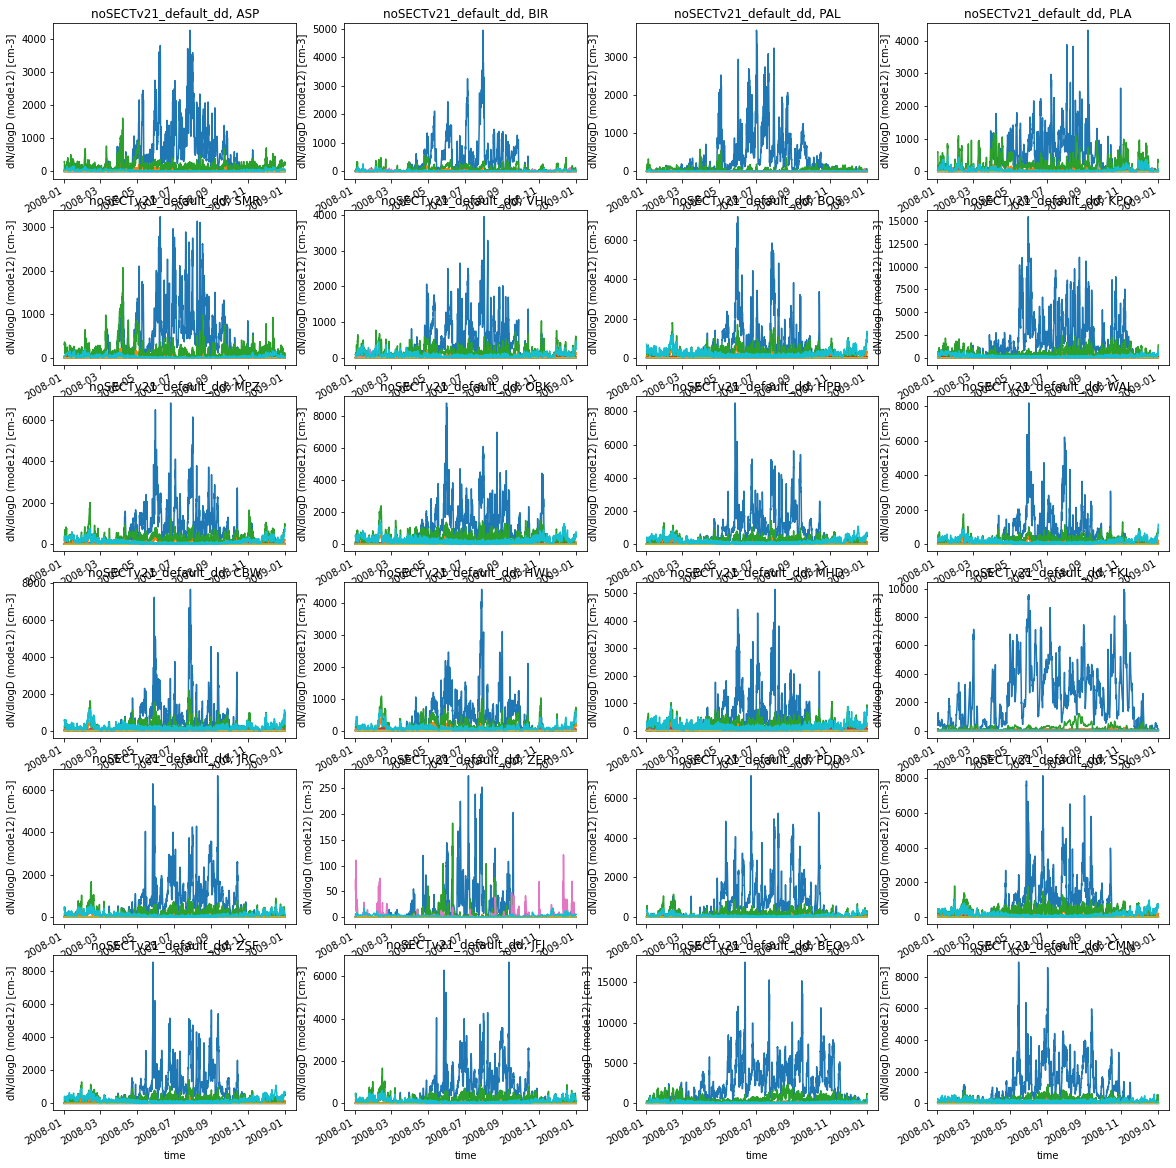

In [ ]:
for case in cases:#, axs.flatten():
    fig, axs = plt.subplots(n_rows,n_cols, figsize=[20,20])
    for var in varl_mod:
        _da = ds_dic[case].isel(lev=-1)[var]
        for station, ax in zip(_da.station.values, axs.flatten()):
            _da.sel(station=station, diameter=100).plot(ax=ax)
            ax.set_title(case+', '+station)
    plt.show()

In [ ]:
for case in cases:#, axs.flatten():
    fig, axs = plt.subplots(n_rows,n_cols, figsize=[20,20])
    _da = ds_dic[case].isel(lev=-1)['dNdlogD_mod']
    for station, ax in zip(_da.station.values, axs.flatten()):
        _da.sel(station=station).plot(ax=ax)
        ax.set_title(case+', '+station)
    plt.show()

In [ ]:
for case in cases_sec:#, axs.flatten():
    fig, axs = plt.subplots(n_rows,n_cols, figsize=[20,20])
    _da = ds_dic[case].isel(lev=-1)['dNdlogD_sec']
    for station, ax in zip(_da.station.values, axs.flatten()):
        _da.sel(station=station).plot(ax=ax)
        ax.set_title(case+', '+station)
    plt.show()

In [ ]:
for case in cases_sec:#, axs.flatten():
    fig, axs = plt.subplots(n_rows,n_cols, figsize=[20,20])
    for var in varl_sec:
        _da = ds_dic[case].isel(lev=-1)[var]
        for station, ax in zip(_da.station.values, axs.flatten()):
            _da.sel(station=station).mean('diameter').plot(ax=ax)
        ax.set_title(case+', '+station)
    plt.show()

In [ ]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(n_rows,n_cols, figsize=[20,20])
    for var, ax in zip(varl_mod, axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()

# 2009-2010

In [ ]:
from_t = '2009-01-01'
to_t = '2010-01-01'

In [ ]:
varl_mod=[]#'dNdlogD_mod']
for i in range(1,14):
    if i in [3,11,13]: 
        continue
    varl_mod.append('dNdlogD_mode%02.0f'%i)
varl_sec=[]#'dNdlogD_sec']
for i in range(1,6):
    varl_sec.append('dNdlogD_sec%02.0f'%i)

    
#,'dNdlogD_sec',
n_rows = 6
n_cols=4

In [ ]:
#arl=['COAGNUCL','GR','GRSOA','GRH2SO4','NUCLRATE','FORMRATE','SO2', 'SOA_NA','SO4_NA', 'cb_SOA_NA','cb_SO4_NA','H2SO4','SOA_LV','SOA_SV', 'NCONC01','NMR01','SIGMA01']
ds_dic={}
for case_name in cases_sec:
    varlist =varl_mod+varl_sec
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',)
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a
    #if c.check_if_load_raw_necessary(varlist ):
    #    a = c.make_station_data_all()
for case_name in cases_orig:
    varlist =varl_mod
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',)
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a

    


In [ ]:
for case in cases:#, axs.flatten():
    fig, axs = plt.subplots(n_rows,n_cols, figsize=[20,20])
    for var in varl_mod:
        _da = ds_dic[case].isel(lev=-1)[var]
        for station, ax in zip(_da.station.values, axs.flatten()):
            _da.sel(station=station, diameter=100).plot(ax=ax)
            ax.set_title(case+', '+station)
    plt.show()

In [ ]:
varl=['N250',
      'N30-50',
      'N50',
      'N100']
n_rows = 2
n_cols=2

In [ ]:
#arl=['COAGNUCL','GR','GRSOA','GRH2SO4','NUCLRATE','FORMRATE','SO2', 'SOA_NA','SO4_NA', 'cb_SOA_NA','cb_SO4_NA','H2SO4','SOA_LV','SOA_SV', 'NCONC01','NMR01','SIGMA01']
ds_dic={}
for case_name in cases_sec:
    varlist =varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           True,
                           'hour',
                           history_field=history_field)
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a
    #if c.check_if_load_raw_necessary(varlist ):
    #    a = c.make_station_data_all()
for case_name in cases_orig:
    varlist =varl
    c = CollocateLONLATout(case_name, from_t, to_t,
                           False,
                           'hour',
                           history_field=history_field)
    a =c.get_station_ds(varlist)
    ds_dic[case_name]=a

    


In [ ]:
for case in cases_orig+cases_sec:
    fig, axs = plt.subplots(n_rows,n_cols, figsize=[20,20])
    for var, ax in zip(varl, axs.flatten()):
        #_,ax = plt.subplots()
        _da = ds_dic[case].isel(lev=-1)[var]
        for station in _da.station.values:
            _da.sel(station=station).plot(ax=ax)
        ax.set_title(case)
    plt.show()